In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df=pd.read_csv("D:\PG-DBDA\Advanced stastical Analysis\\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape #size of data

(768, 9)

In [5]:
df.describe(include='all') #statistics values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()# check null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df.drop('Outcome', axis=1)#independent
y = df.Outcome #dependent

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state=0) #spliting data

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()  

In [10]:
from sklearn.linear_model import LogisticRegression #model

In [11]:
logmodel = LogisticRegression()

In [12]:
logmodel.fit(X_train,y_train) #fit model

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predictions = logmodel.predict(X_test) #predict

In [14]:
#trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.
from sklearn.metrics import roc_curve
pred_prob = logmodel.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [15]:
fpr

array([0.        , 0.        , 0.        , 0.00934579, 0.00934579,
       0.01869159, 0.01869159, 0.02803738, 0.02803738, 0.03738318,
       0.03738318, 0.05607477, 0.05607477, 0.06542056, 0.06542056,
       0.07476636, 0.07476636, 0.12149533, 0.12149533, 0.14018692,
       0.14018692, 0.19626168, 0.19626168, 0.20560748, 0.20560748,
       0.24299065, 0.24299065, 0.29906542, 0.29906542, 0.30841121,
       0.30841121, 0.37383178, 0.37383178, 0.45794393, 0.45794393,
       0.5046729 , 0.5046729 , 0.8317757 , 0.8317757 , 1.        ])

In [16]:
tpr

array([0.        , 0.0212766 , 0.04255319, 0.04255319, 0.06382979,
       0.06382979, 0.21276596, 0.21276596, 0.44680851, 0.44680851,
       0.46808511, 0.46808511, 0.53191489, 0.53191489, 0.59574468,
       0.59574468, 0.61702128, 0.61702128, 0.65957447, 0.65957447,
       0.68085106, 0.68085106, 0.72340426, 0.72340426, 0.74468085,
       0.74468085, 0.82978723, 0.82978723, 0.85106383, 0.85106383,
       0.91489362, 0.91489362, 0.93617021, 0.93617021, 0.95744681,
       0.95744681, 0.9787234 , 0.9787234 , 1.        , 1.        ])

In [17]:
thresh

array([1.96299168, 0.96299168, 0.95768189, 0.95343924, 0.91005016,
       0.90630855, 0.76956662, 0.75945201, 0.68980523, 0.66928246,
       0.66496397, 0.63468158, 0.62083853, 0.61974753, 0.5749825 ,
       0.53917012, 0.53735071, 0.46086764, 0.44227722, 0.42980112,
       0.42538152, 0.39519242, 0.39298442, 0.38880305, 0.38563128,
       0.36598582, 0.3518891 , 0.32619423, 0.32010163, 0.31935054,
       0.29974213, 0.25732159, 0.24585969, 0.21018942, 0.2078832 ,
       0.19077361, 0.1877307 , 0.07717577, 0.07634902, 0.00278531])

In [18]:
#random_probs = [0 for i in range(len(y_test))]
#p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [19]:
#auc
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, pred_prob[:,1])

In [26]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, pred_prob[:,1])

In [27]:
print(roc_score)

0.8665738715450388


In [20]:
print(auc_score)

0.8665738715450388


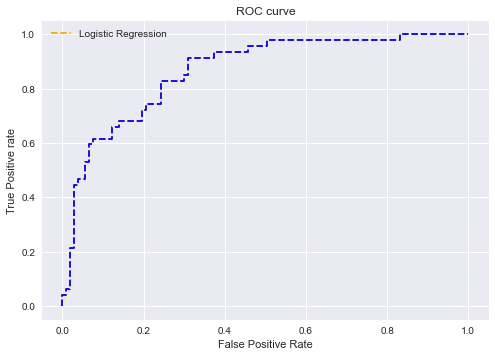

In [22]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [23]:
#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [25]:
confusion_matrix(y_test,predictions)

array([[98,  9],
       [18, 29]], dtype=int64)

True Positive is 98

True Negative is 29

False Positive is 9

False Negative is 18

In [ ]:
#decision tree
#Naive bays